In [1]:
pip install face_recognition

     |████████████████████████████████| 100.1 MB 23 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=c7f452f8dbc540ebc78b7bce7d5162fbbc22ccfd4a6342cd6800dea4d3a2e90a
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [2]:
!mkdir known
!wget https://assets.teenvogue.com/photos/5ed5202161d3a9e3e9a99781/1:1/w_3712,h_3712,c_limit/GettyImages-1191544280.jpg -O known/rihanna.jpg
!wget http://media.masslive.com/entertainment/photo/10794954-large.jpg -O known/katy.jpg
!wget https://elizabeth-olsen.com/photos/albums/Studio%20Photoshoots/Outtakes%20Sessions/2019/2019-003-VarietyPortrait-Emmys/008.jpg -O known/elizabethOlsen.jpg

--2021-09-16 09:39:43--  https://assets.teenvogue.com/photos/5ed5202161d3a9e3e9a99781/1:1/w_3712,h_3712,c_limit/GettyImages-1191544280.jpg
Resolving assets.teenvogue.com (assets.teenvogue.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to assets.teenvogue.com (assets.teenvogue.com)|151.101.0.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1565623 (1.5M) [image/jpeg]
Saving to: ‘known/rihanna.jpg’

known/rihanna.jpg   100%[===================>]   1.49M  --.-KB/s    in 0.06s   

2021-09-16 09:39:43 (27.1 MB/s) - ‘known/rihanna.jpg’ saved [1565623/1565623]

--2021-09-16 09:39:43--  http://media.masslive.com/entertainment/photo/10794954-large.jpg
Resolving media.masslive.com (media.masslive.com)... 151.101.2.133, 151.101.66.133, 151.101.130.133, ...
Connecting to media.masslive.com (media.masslive.com)|151.101.2.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25559 (25K) [image/jpeg]
Saving to: ‘known/katy.jp

In [5]:
!mkdir unknown
!wget https://studybreaks.com/wp-content/uploads/2018/03/Rihanna.jpg -O unknown/rih.jpg
!wget https://new-img.patrika.com/upload/2020/08/27/999_6365772-m.jpg -O unknown/katy.jpg
!wget https://image.shutterstock.com/image-photo/elizabeth-olsen-attends-wind-river-260nw-665069653.jpg -O unknown/elizabeth.jpg
!wget https://225508-687545-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2020/01/Renee-Kujur-5.jpg -O unknown/Renne.jpg

--2021-09-16 09:43:29--  https://studybreaks.com/wp-content/uploads/2018/03/Rihanna.jpg
Resolving studybreaks.com (studybreaks.com)... 18.232.245.187, 50.16.49.81, 52.86.133.10, ...
Connecting to studybreaks.com (studybreaks.com)|18.232.245.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘unknown/rih.jpg’

unknown/rih.jpg         [ <=>                ] 176.48K  --.-KB/s    in 0.09s   

2021-09-16 09:43:30 (2.02 MB/s) - ‘unknown/rih.jpg’ saved [180712]

--2021-09-16 09:43:30--  https://new-img.patrika.com/upload/2020/08/27/999_6365772-m.jpg
Resolving new-img.patrika.com (new-img.patrika.com)... 104.20.28.46, 172.67.0.152, 104.20.29.46, ...
Connecting to new-img.patrika.com (new-img.patrika.com)|104.20.28.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30994 (30K) [image/jpeg]
Saving to: ‘unknown/katy.jpg’

unknown/katy.jpg    100%[===================>]  30.27K  --.-KB/s    in 0.002s  

2021-09

/content/known/katy.jpg
/content/known/elizabethOlsen.jpg
/content/known/rihanna.jpg
Processing katy.jpg
/content/unknown/katy.jpg


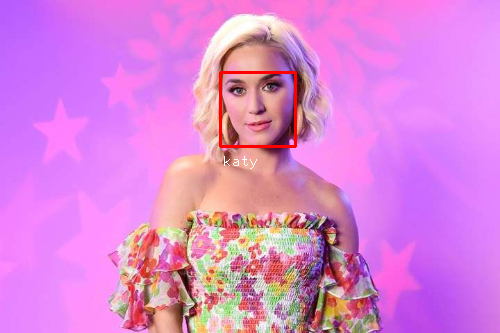

Processing elizabeth.jpg
/content/unknown/elizabeth.jpg


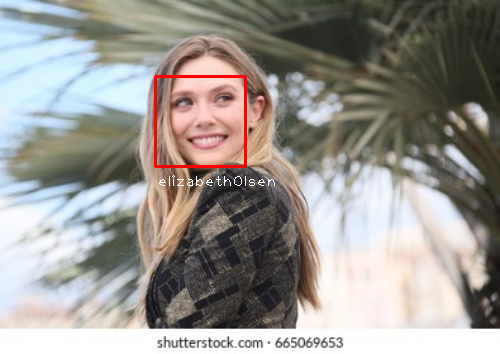

Processing rih.jpg
/content/unknown/rih.jpg


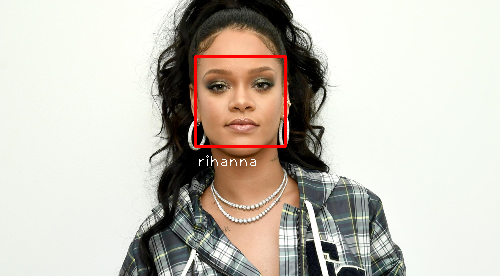

Processing Renne.jpg
/content/unknown/Renne.jpg


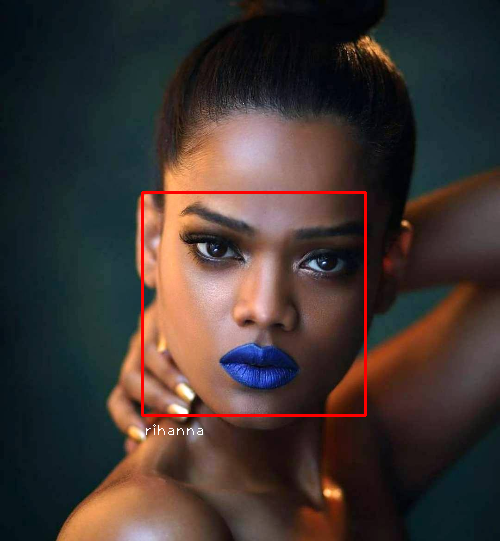

In [6]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
    img = cv2.imread(path)
    assert not isinstance(img,type(None)), 'image not found'
    h,w,c = img.shape
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))


known_encodings = []
known_names = []
known_dir = 'known'

for file in os.listdir(known_dir):  
    print('/content/known/' + file)
    img = read_img('/content/known/' + file)       
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
    print("Processing", file)    
    print('/content/unknown/' + file)
    img = read_img('/content/unknown/' + file)  
    img_enc = face_recognition.face_encodings(img)[0]

    results = face_recognition.compare_faces(known_encodings, img_enc)
    # print(face_recognition.face_distance(known_encodings, img_enc))

    for i in range(len(results)):
        if results[i]:
            name = known_names[i]
            (top, right, bottom, left) = face_recognition.face_locations(img)[0]
            cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
            cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
            cv2_imshow(img)
            

    # print(results)